<a href="https://colab.research.google.com/github/alimoorreza/CS128-sp25-notes/blob/main/cs128_state_generation_without_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Robots are typically designed to operate in dynamic environments, making it beneficial to utilize incoming data in real time to incrementally enhance our understanding of the surroundings. This necessitates the sequential estimation of posterior distributions as actions are executed and observations are acquired. Let $x_k$ represent the state at time $k$, $a_k$ the action taken at time $k$, and $z_k$ the observation obtained at time $k$. By employing models that describe how actions lead to state transitions and how states generate observations, we can refine our estimates of the system's state over time.

Let's consider Newton’s laws of motion along 1D line without any noise:
> $x_k = A x_{k-1} + a_k B$

where $
A = \begin{bmatrix}
1 & T \\
0 & 1
\end{bmatrix}$,
$B = \begin{bmatrix}
\frac{T^2}{2m} \\
\frac{T}{m}
\end{bmatrix}$
and $a_k$ is a force which is the control that we get to apply to this system for T=0.5 seconds. According to Newton's law of motion $a_k=m*acceleration$. Rearranging the equation:

> $acceleration=a_k/m$

The derivation is as follows:
<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs128_sp25/newtonian_motion_model.jpg" width=450/>
</div>

In [ ]:
import numpy as np
# Generate time stamps from 1 to 1000
total_number_of_samples = 375

t = np.array(range(1,total_number_of_samples+1))
#print(t)


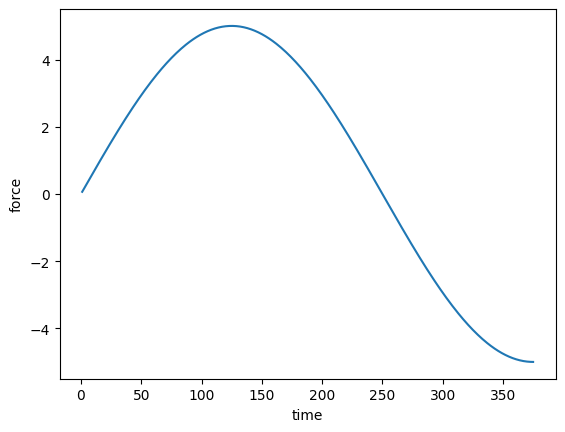

In [ ]:
# Generate a set of forces for each time step that can be exerted on the robot
# Let's assume the force is applied following a sinusoidal wave: 5*sin(2*pi*t/500)
import matplotlib.pyplot as plt
f = 5*np.sin(2*np.pi*t/500)
#print(f)
plt.plot(t, f)
plt.xlabel('time')
plt.ylabel('force')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
x                       = np.zeros((2, total_number_of_samples))
#print(x)


In [ ]:
T   = 0.1 # 0.1 second
m   = 5   # mass of the robot on which the force is exerted

# initial state vector
x0  = np.array([[0],
               [0]])


# initialize state history vectors for each time stamp
x   = np.zeros((2, total_number_of_samples))

# state transition input matrices
A   = np.array([[1, T],
              [0, 1]])
B   = np.array([[T**2 / (2 * m)],
              [T / m]])


print(f'A={A}')
print(f'B={B}')

A=[[1.  0.1]
 [0.  1. ]]
B=[[0.001]
 [0.02 ]]


In [ ]:
# sequential motion update for each time stamps eg, 1 to 375
for i in range(len(t)):
    if i == 0:
        x[:, i] = (A @ x0 + B * f[i]).flatten()
    else:
        x[:, i] = (A @ x[:, i-1].reshape(2,1) + B * f[i]).flatten()


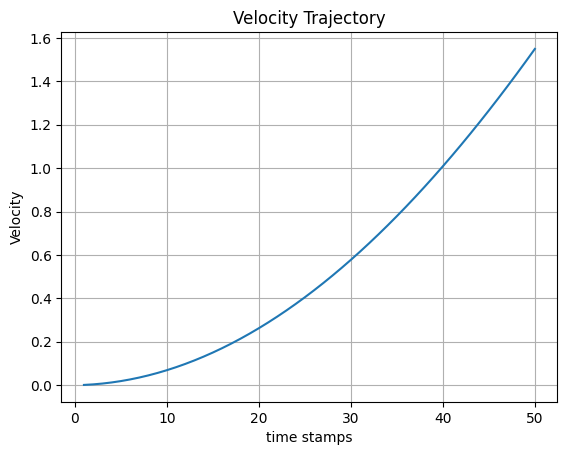

In [ ]:
# plotting velocity vs. time stamps
#plt.plot(t, x[1, :])
plt.plot(t[:50], x[1, :50])
plt.xlabel('time stamps')
plt.ylabel('Velocity')
plt.title('Velocity Trajectory')
plt.grid(True)
plt.show()

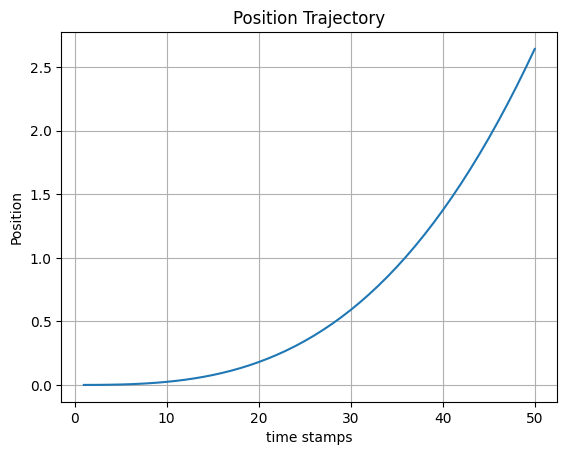

In [ ]:
# plotting position vs. time stamps
#plt.plot(t, x[0, :])
plt.plot(t[:50], x[0, :50])
plt.xlabel('time stamps')
plt.ylabel('Position')
plt.title('Position Trajectory')
plt.grid(True)
plt.show()

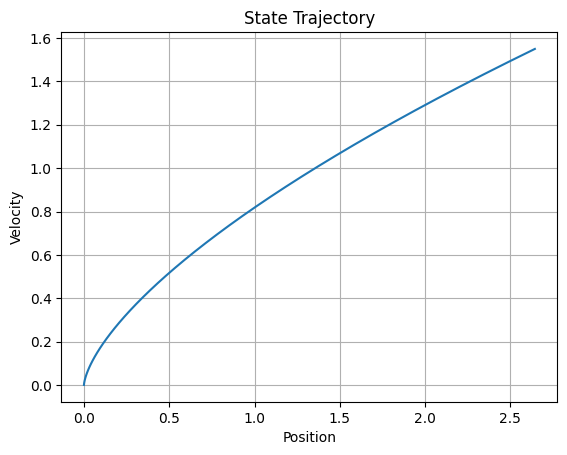

In [ ]:
# plotting position vs. velocity
#plt.plot(x[0, :], x[1, :])
plt.plot(x[0, :50], x[1, :50])
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('State Trajectory')
plt.grid(True)
plt.show()